In [2]:
from sage.graphs.independent_sets import IndependentSets
import random


def beta(x,y,n):
    return (y*x^(2^(n/2))).trace()

def conlon_ferber(n, sub):
    if n % 2 != 0:
        raise Exception('Conlon-Ferber graph must be defined on an even dimension.')
       
    F.<a> = GF(2^n, modulus = 'primitive')

    # Vertices are the non zero elements of F_(2^n)
    V = list(F)
    V.remove(0)
    
    
    gen = a^int((2^(n)-1)/(sub))
    sub_group = [gen^i for i in range(sub)]
    print("Finished generating the graph")
    return Graph([sub_group, lambda x,y: beta(x,y,n) != 0], loops = False)

def ILP_small_independent_sets(G,k):
    print("Starting to enumerate maximal independent sets ...")

    Im = IndependentSets(G, maximal=True)
    maximals = [x for i,x in enumerate(Im)]
    
    print("Finished enumerating maximal independent sets ...")
    print("There are ", len(maximals), " many linear constraints")


    Vertex = [x for i,x in enumerate(G.vertices())]

    p = MixedIntegerLinearProgram(solver='Gurobi')

    T = p.new_variable(binary=True)

    p.set_objective(p.sum(T[i] for i in G.vertices()))
    
    print("Maximizing T ...")

    for m in maximals:
        p.add_constraint(p.sum(T[i] for i in m) <= k)


    
    print(round(p.solve()))
    T = p.get_values(T)
    
    print("Found T")

    G_subgraph = G.copy()
    for i in range(len(G.vertices())):
        if T[Vertex[i]] == 0:
            G_subgraph.delete_vertex(Vertex[i])
            
    G_subgraph.show()


    print("number of veritces: " ,len(G_subgraph.vertices()))
    print("clique:", G_subgraph.clique_number())
    print("independent set : " , len(G_subgraph.independent_set()))
    
    return G_subgraph

def ILP_small_cliques(G,k):

    G_comp = G.complement()
    Vertex = [x for i,x in enumerate(G.vertices())]

    print("Starting to enumerate the maximal independent sets ...")

    Im = IndependentSets(G_comp, maximal=True)
    maximals = [x for i,x in enumerate(Im)]
    #maximals = random.sample(maximals, 1000)
    
    print("Finished enumerating maximal independent sets ...")

    print("There are ", len(maximals), " many linear constraints")
    

    p = MixedIntegerLinearProgram(solver='Gurobi')
    T = p.new_variable(binary=True)
    p.set_objective(p.sum(T[i] for i in G_comp.vertices()))
 
    print("Maximizing T ...")
    
    count = 0
    for m in maximals:
        p.add_constraint(p.sum(T[i] for i in m) <= k)
        count = count + 1
        if count == int(len(maximals)/2): 
            print("Halfway there ...")

    
    print(round(p.solve()))
    T = p.get_values(T)


    G_comp_subgraph = G_comp.copy()
    
    for i in range(len(G_comp.vertices())):
        if T[Vertex[i]] == 0:
            G_comp_subgraph.delete_vertex(Vertex[i])


    G_comp_subgraph.show()
    print("# of vertices: ",len(G_comp_subgraph.vertices()))
    print("Clique Number:", G_comp_subgraph.clique_number())
    print("Independent Set:", len(G_comp_subgraph.independent_set()))
    
    return G_comp_subgraph

def analyze_graph(G):
    print("# of vertices: ", G.order())
    print("Maximum Clique: ", G.clique_number())
    print("Maximum Independent set: ", len(G.independent_set()))
    

# R(4,4,17)

In [19]:

sub = 17
G = conlon_ferber(8,sub)
analyze_graph(G)
G.plot3d(edge_size = 0.002, vertex_size = 0.04)

Finished generating the graph
# of vertices:  17
Maximum Clique:  3
Maximum Independent set:  3


Graphics3d Object

# R(4,5,21)

Finished generating the graph
Starting to enumerate the maximal independent sets ...
Finished enumerating maximal independent sets ...
There are  5576  many linear constraints
Maximizing T ...
Halfway there ...
21.0


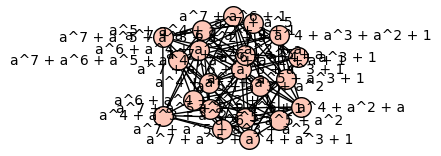

# of vertices:  21
Clique Number: 3
Independent Set: 4


In [24]:
sub = 51
G = conlon_ferber(8,sub)
C = ILP_small_cliques(G,4)

# R(4,6,27)

Finished generating the graph
Starting to enumerate the maximal independent sets ...
Finished enumerating maximal independent sets ...
There are  5576  many linear constraints
Maximizing T ...
Halfway there ...
27.0


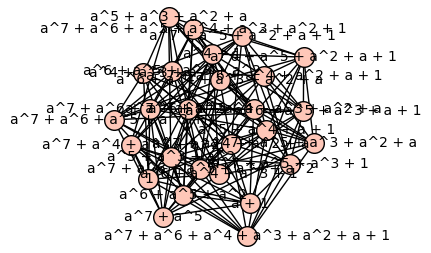

# of vertices:  27
Clique Number: 3
Independent Set: 5


In [20]:
sub = 51
G = conlon_ferber(8,sub)
C = ILP_small_cliques(G,5)